In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def slope_unc (x,y,fit):
    sqsum = sum((y-fit(x))**2)
    Delta = x.size*sum(x**2)-(sum(x))**2
    sigma = np.sqrt(1/(x.size-2)*sqsum)
    return (sigma*np.sqrt(x.size/Delta))

In [3]:
amb = np.array([72,95,66,71,54,96,79,86,78,84])

In [4]:
amb = amb/300

### Cesium-137

In [5]:
cs2 = np.array([477,414,448,1325,1298,1290,4339])
t = np.array([60,60,60,180,180,180,600])

In [6]:
cs2 = cs2/t

In [7]:
cs2

array([7.95      , 6.9       , 7.46666667, 7.36111111, 7.21111111,
       7.16666667, 7.23166667])

In [8]:
cs4 = np.array([193,184,184,600,593,583])
t = np.array([60,60,60,180,180,180])

In [9]:
cs4 = cs4/t

In [10]:
cs8 = np.array([64,58,66,216,208,182])
t = np.array([60,60,60,180,180,180])

In [11]:
cs8 = cs8/t

In [12]:
cs8

array([1.06666667, 0.96666667, 1.1       , 1.2       , 1.15555556,
       1.01111111])

In [13]:
amb = np.average(amb)

In [14]:
cs8 = cs8-amb
cs4 = cs4-amb
cs2 = cs2-amb

In [15]:
r = np.array([2,4,8])
i = np.array([np.average(cs2),np.average(cs4),np.average(cs8)])

In [16]:
z=np.polyfit(np.log(r),np.log(i),1)
f=np.poly1d(z)

In [17]:
def inv_square (x,a):
    return (a/(x**2))
def free_fit (x,a,b):
    return (a/(x**b))
def log_fit (x,a):
    return (a/(x**(-z[0])))

In [18]:
popt,cov = curve_fit(inv_square,r,i)

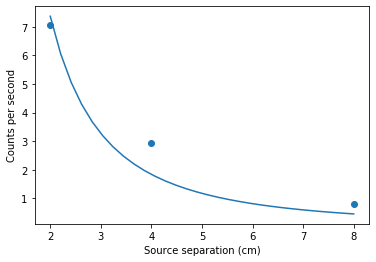

In [19]:
x = np.linspace(2,8,30)
plt.scatter(r,i)
plt.plot(x,inv_square(x,popt[0]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.show()

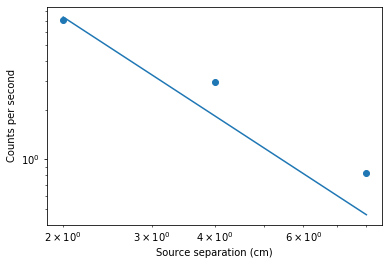

In [20]:
plt.scatter(r,i)
plt.plot(x,inv_square(x,popt[0]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [21]:
popt,cov = curve_fit(log_fit,r,i)

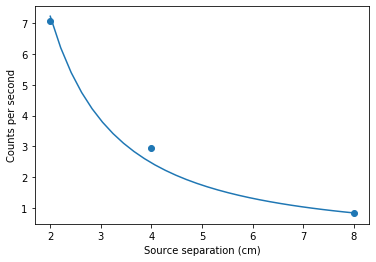

In [22]:
plt.scatter(r,i)
plt.plot(x,log_fit(x,popt[0]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.show()

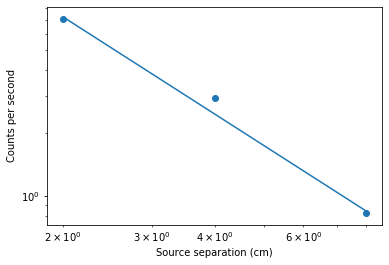

In [23]:
plt.scatter(r,i)
plt.plot(x,log_fit(x,popt[0]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [24]:
popt,cov = curve_fit(free_fit,r,i)

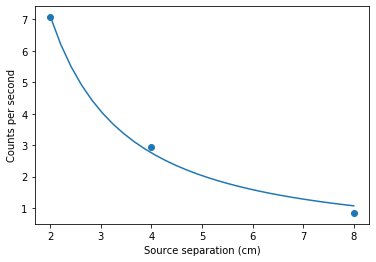

In [25]:
plt.scatter(r,i)
plt.plot(x,free_fit(x,popt[0],popt[1]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.show()

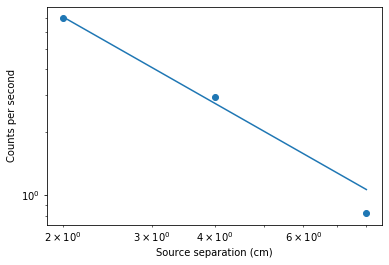

In [26]:
plt.scatter(r,i)
plt.plot(x,free_fit(x,popt[0],popt[1]))
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [27]:
slope_unc(np.log(r),np.log(i),f)

0.16572493292415508

In [28]:
z

array([-1.55100684,  3.09675022])

In [29]:
A = np.pi*(2.125**2)

In [30]:
solid_ang = A/(r**2)

In [31]:
tot = (i*4*np.pi)/solid_ang

In [32]:
tot

array([25.03808513, 41.70329566, 46.65755017])

### Barium-133

In [33]:
ba2 = np.array([86,78,102,301,286,303,1006])
t = np.array([60,60,60,180,180,180,600])

In [34]:
ba2 = ba2/t

In [35]:
ba4 = np.array([79,81,78,218,236,224])
t = np.array([60,60,60,180,180,180])

In [36]:
ba4 = ba4/t

In [37]:
ba2 = ba2-amb
ba4 = ba4-amb

In [38]:
ba = np.array([np.average(ba2),np.average(ba4)])
R = np.array([2,4])

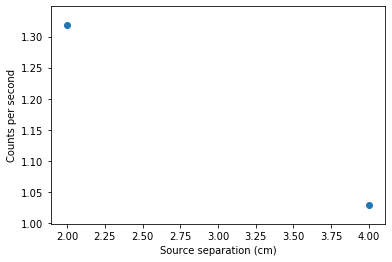

In [39]:
plt.scatter(R,ba)
plt.xlabel('Source separation (cm)')
plt.ylabel('Counts per second')
plt.show()

In [40]:
TOT = ba*4*np.pi/solid_ang[:2]

In [41]:
TOT

array([ 4.67310024, 14.57772857])

## Shielding

In [42]:
amb = np.array([111,179])
t = np.array([240,480])

In [43]:
amb = amb/t

In [44]:
ba_r1 = np.array([219,424])
ba_r2 = np.array([209,407])
ba_r3 = np.array([132,267])

In [45]:
sr_r1 = np.array([121,224])
sr_r2 = np.array([116,237])
sr_r3 = np.array([99,195])

In [46]:
cs_r1 = np.array([294,606])
cs_r2 = np.array([308,589])
cs_r3 = np.array([270,516])

In [47]:
cd_r1 = np.array([89,178])
cd_r2 = np.array([75,137])
cd_r3 = np.array([81,172])

In [48]:
uk_r1 = np.array([213,412])
uk_r2 = np.array([200,409])
uk_r3 = np.array([185,399])

In [49]:
ba_r1 = ba_r1/t
ba_r2 = ba_r2/t
ba_r3 = ba_r3/t

sr_r1 = sr_r1/t
sr_r2 = sr_r2/t
sr_r3 = sr_r3/t

cs_r1 = cs_r1/t
cs_r2 = cs_r2/t
cs_r3 = cs_r3/t

cd_r1 = cd_r1/t
cd_r2 = cd_r2/t
cd_r3 = cd_r3/t

uk_r1 = uk_r1/t
uk_r2 = uk_r2/t
uk_r3 = uk_r3/t

In [50]:
ba_r1 = ba_r1-amb
ba_r2 = ba_r2-amb
ba_r3 = ba_r3-amb

sr_r1 = sr_r1-amb
sr_r2 = sr_r2-amb
sr_r3 = sr_r3-amb

cs_r1 = cs_r1-amb
cs_r2 = cs_r2-amb
cs_r3 = cs_r3-amb

cd_r1 = cd_r1-amb
cd_r2 = cd_r2-amb
cd_r3 = cd_r3-amb

uk_r1 = uk_r1-amb
uk_r2 = uk_r2-amb
uk_r3 = uk_r3-amb